# Timeseries

## import dependencies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
# Task 1: Data Loading & Exploration
file_path = "exchange_rate.csv"
df = pd.read_csv(file_path, parse_dates=[0])
df.columns = ['date', 'Ex_rate']
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7588 non-null   datetime64[ns]
 1   Ex_rate  7588 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 118.7 KB
        date  Ex_rate
0 1990-01-01   0.7855
1 1990-02-01   0.7818
2 1990-03-01   0.7867
3 1990-04-01   0.7860
4 1990-05-01   0.7849


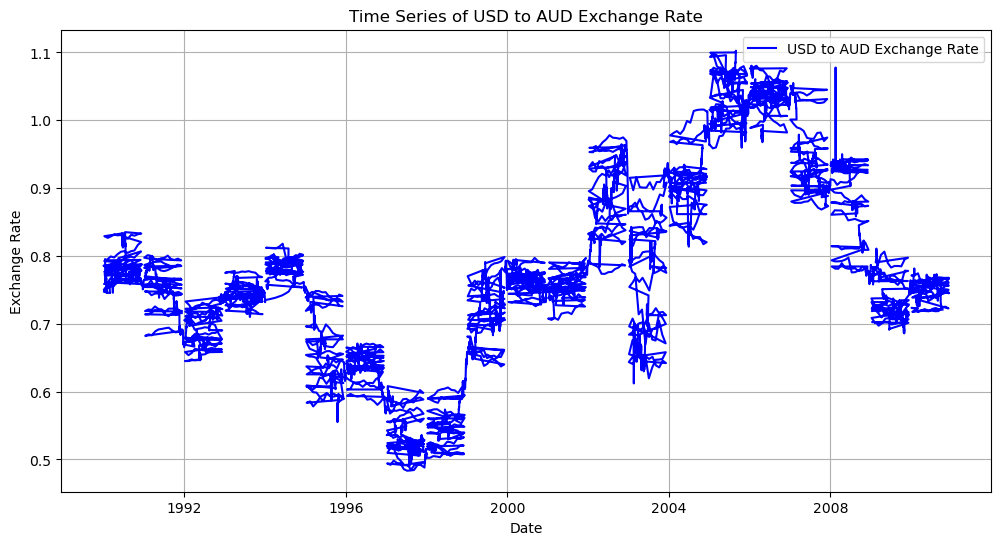

In [7]:
# Task 2: Time Series Visualization & Decomposition
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Ex_rate'], label="USD to AUD Exchange Rate", color="blue")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("Time Series of USD to AUD Exchange Rate")
plt.legend()
plt.grid(True)
plt.show()

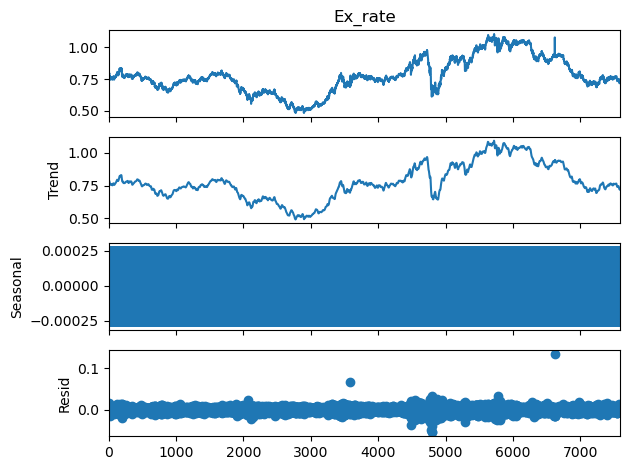

In [9]:
# Decomposing the time series
decomposition = seasonal_decompose(df['Ex_rate'], model="additive", period=12)
decomposition.plot()
plt.show()

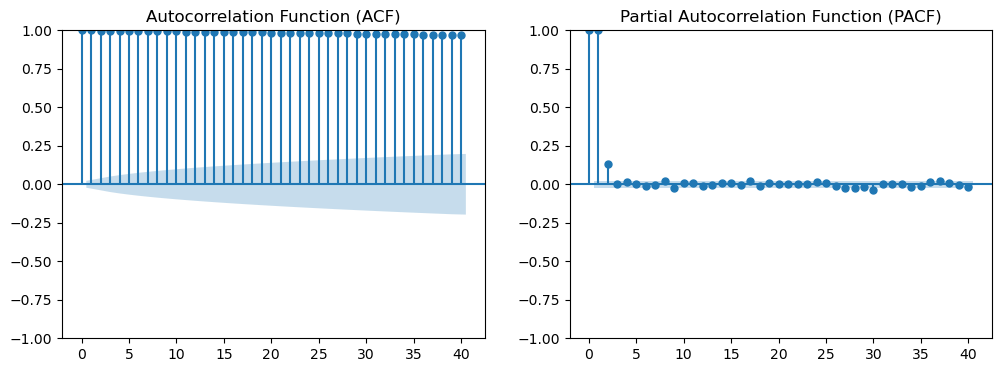

In [11]:
# Task 3: ACF & PACF Plots for ARIMA Parameter Selection
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df['Ex_rate'], ax=axes[0], lags=40)
axes[0].set_title("Autocorrelation Function (ACF)")
plot_pacf(df['Ex_rate'], ax=axes[1], lags=40)
axes[1].set_title("Partial Autocorrelation Function (PACF)")
plt.show()

In [13]:
# Task 4: ARIMA Model Fitting & Forecasting
arima_model = ARIMA(df['Ex_rate'], order=(2, 1, 2))
arima_fitted = arima_model.fit()
forecast_steps = 12
forecast_arima = arima_fitted.forecast(steps=forecast_steps)
future_dates = pd.date_range(start=df["date"].iloc[-1], periods=forecast_steps + 1, freq='M')[1:]

C:\Users\dnyan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


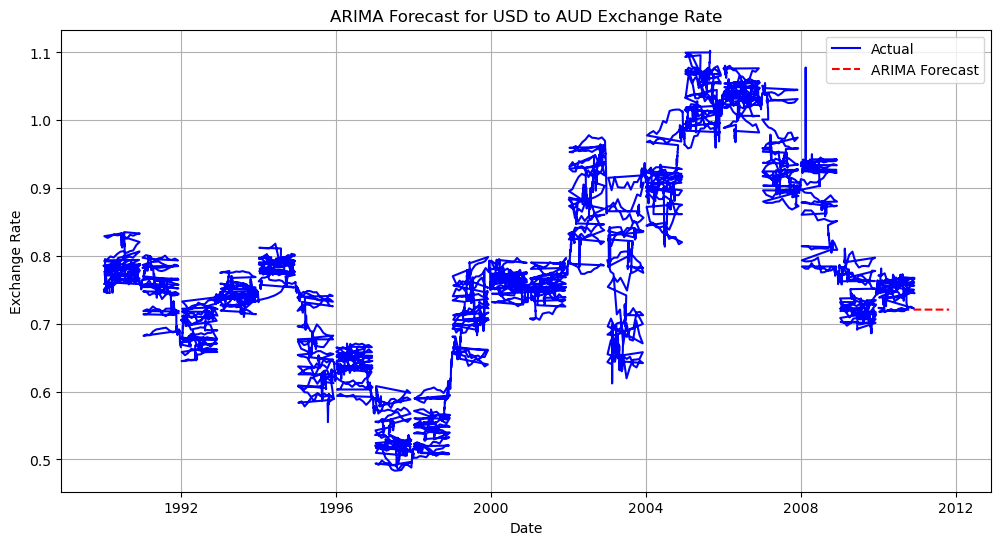

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Ex_rate'], label="Actual", color="blue")
plt.plot(future_dates, forecast_arima, label="ARIMA Forecast", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("ARIMA Forecast for USD to AUD Exchange Rate")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Task 5: Exponential Smoothing Model Fitting & Forecasting
exp_smooth_model = ExponentialSmoothing(df['Ex_rate'], trend="add", seasonal="add", seasonal_periods=12)
exp_smooth_fitted = exp_smooth_model.fit()
forecast_exp = exp_smooth_fitted.forecast(steps=forecast_steps)

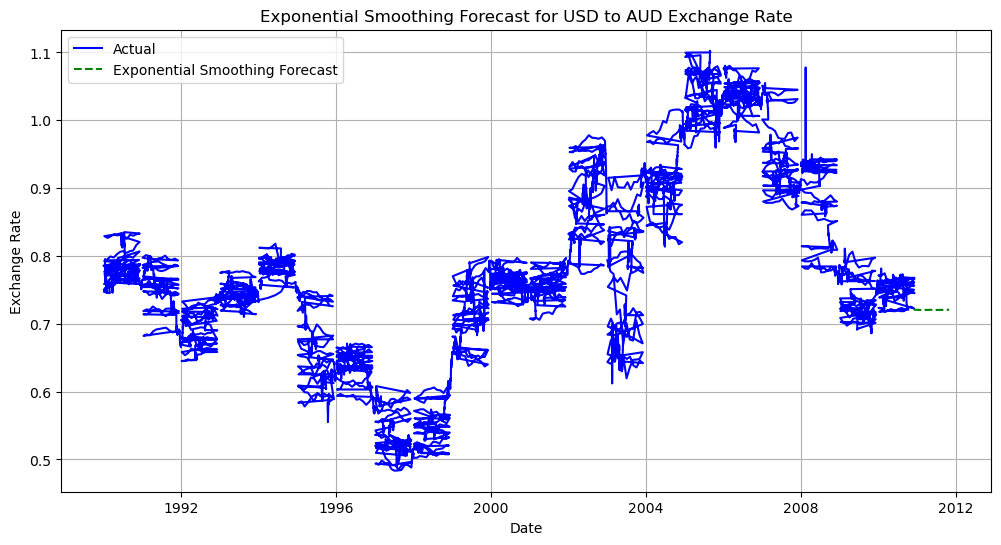

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Ex_rate'], label="Actual", color="blue")
plt.plot(future_dates, forecast_exp, label="Exponential Smoothing Forecast", color="green", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("Exponential Smoothing Forecast for USD to AUD Exchange Rate")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Task 6: Model Evaluation & Comparison
actual_values = df['Ex_rate'].iloc[-forecast_steps:].values

mae_arima = mean_absolute_error(actual_values, forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(actual_values, forecast_arima))
mape_arima = np.mean(np.abs((actual_values - forecast_arima) / actual_values)) * 100

In [25]:
mae_exp = mean_absolute_error(actual_values, forecast_exp)
rmse_exp = np.sqrt(mean_squared_error(actual_values, forecast_exp))
mape_exp = np.mean(np.abs((actual_values - forecast_exp) / actual_values)) * 100

In [27]:
error_metrics = pd.DataFrame({
    "Model": ["ARIMA(2,1,2)", "Exponential Smoothing"],
    "MAE": [mae_arima, mae_exp],
    "RMSE": [rmse_arima, rmse_exp],
    "MAPE (%)": [mape_arima, mape_exp]
})
print(error_metrics)

                   Model       MAE      RMSE  MAPE (%)
0           ARIMA(2,1,2)  0.001671  0.002007  0.231881
1  Exponential Smoothing  0.001581  0.001864  0.219268
